# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_data = []

print("Beginning Data Retrieval")
print("------------------------")
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    city_url = url + "&q=" + city
    print("Proccessing Record %s of set %s | %s" %(record_count, set_count, city))
    record_count += 1
    print(city_url)
    print("")
    try:
        print("in try")
        city_weather = requests.get(city_url).json()
        print("after json")
        city_lat = city_weather["coord"]["lat"]
        print("after lat ")
        print(city_lat)
        city_lng = city_weather["coord"]["lon"]
        print("lng")
        city_max_temp = city_weather["main"]["temp_max"]
        print("max")
        city_humidity = city_weather["main"]["humidity"]
        print("humid")
        print(city_humidity)
        city_clouds = city_weather["clouds"]["all"]
        print("clouds")
        city_wind = city_weather["wind"]["speed"]
        print("wind")      
        city_country = city_weather["sys"]["country"]
        print("country")
        print(city_country)
        city_date = city_weather["dt"]
        print("date")
        city_data.append({"City": city, 
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        print("after append")
    except:
        print("city not found.skipping")
        pass
print("-----------------")
print("data retrival complete")
print("-----------------")

Beginning Data Retrieval
------------------------
Proccessing Record 1 of set 1 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=leningradskiy

in try
after json
after lat 
69.38
lng
max
humid
85
clouds
wind
country
RU
date
after append
Proccessing Record 2 of set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=qaanaaq

in try
after json
after lat 
77.48
lng
max
humid
91
clouds
wind
country
GL
date
after append
Proccessing Record 3 of set 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=saskylakh

in try
after json
after lat 
71.92
lng
max
humid
87
clouds
wind
country
RU
date
after append
Proccessing Record 4 of set 1 | sakakah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=sakakah

in try
after json
after lat 
29.97
lng
max
humi

after json
after lat 
-2.92
lng
max
humid
77
clouds
wind
country
BR
date
after append
Proccessing Record 37 of set 1 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=nizhneyansk

in try
after json
city not found.skipping
Proccessing Record 38 of set 1 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=puerto ayora

in try
after json
after lat 
-0.74
lng
max
humid
93
clouds
wind
country
EC
date
after append
Proccessing Record 39 of set 1 | bozova
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=bozova

in try
after json
after lat 
37.36
lng
max
humid
48
clouds
wind
country
TR
date
after append
Proccessing Record 40 of set 1 | temaraia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=temaraia

in try
after json
city not found.skipping
Proccessing Re

after json
after lat 
28.37
lng
max
humid
73
clouds
wind
country
JP
date
after append
Proccessing Record 24 of set 2 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=ilulissat

in try
after json
after lat 
69.22
lng
max
humid
68
clouds
wind
country
GL
date
after append
Proccessing Record 25 of set 2 | raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=raudeberg

in try
after json
after lat 
61.99
lng
max
humid
61
clouds
wind
country
NO
date
after append
Proccessing Record 26 of set 2 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=georgetown

in try
after json
after lat 
5.41
lng
max
humid
78
clouds
wind
country
MY
date
after append
Proccessing Record 27 of set 2 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=victoria

in try
a

after json
after lat 
66.15
lng
max
humid
72
clouds
wind
country
CA
date
after append
Proccessing Record 9 of set 3 | bosaso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=bosaso

in try
after json
after lat 
11.28
lng
max
humid
82
clouds
wind
country
SO
date
after append
Proccessing Record 10 of set 3 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=touros

in try
after json
after lat 
-5.2
lng
max
humid
83
clouds
wind
country
BR
date
after append
Proccessing Record 11 of set 3 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=torbay

in try
after json
after lat 
47.67
lng
max
humid
85
clouds
wind
country
CA
date
after append
Proccessing Record 12 of set 3 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=dikson

in try
after json
after lat 
73.5

after json
after lat 
32.67
lng
max
humid
62
clouds
wind
country
PT
date
after append
Proccessing Record 43 of set 3 | atherton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=atherton

in try
after json
after lat 
53.52
lng
max
humid
84
clouds
wind
country
GB
date
after append
Proccessing Record 44 of set 3 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=port alfred

in try
after json
after lat 
-33.59
lng
max
humid
94
clouds
wind
country
ZA
date
after append
Proccessing Record 45 of set 3 | tubruq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=tubruq

in try
after json
city not found.skipping
Proccessing Record 46 of set 3 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=belushya guba

in try
after json
city not found.skipping
Proccessing

after json
after lat 
50.7
lng
max
humid
100
clouds
wind
country
CA
date
after append
Proccessing Record 29 of set 4 | sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=sangar

in try
after json
after lat 
63.92
lng
max
humid
80
clouds
wind
country
RU
date
after append
Proccessing Record 30 of set 4 | husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=husavik

in try
after json
after lat 
66.04
lng
max
humid
68
clouds
wind
country
IS
date
after append
Proccessing Record 31 of set 4 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=sao filipe

in try
after json
after lat 
14.9
lng
max
humid
83
clouds
wind
country
CV
date
after append
Proccessing Record 32 of set 4 | hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=hobyo

in try
after json
after 

after json
after lat 
49.58
lng
max
humid
80
clouds
wind
country
FR
date
after append
Proccessing Record 13 of set 5 | dubai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=dubai

in try
after json
after lat 
25.26
lng
max
humid
59
clouds
wind
country
AE
date
after append
Proccessing Record 14 of set 5 | alugan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=alugan

in try
after json
after lat 
12.22
lng
max
humid
72
clouds
wind
country
PH
date
after append
Proccessing Record 15 of set 5 | honiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=honiara

in try
after json
after lat 
-9.43
lng
max
humid
70
clouds
wind
country
SB
date
after append
Proccessing Record 16 of set 5 | hellvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=hellvik

in try
after json
after lat 


after json
after lat 
-13.34
lng
max
humid
71
clouds
wind
country
BR
date
after append
Proccessing Record 48 of set 5 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=mount gambier

in try
after json
after lat 
-37.83
lng
max
humid
68
clouds
wind
country
AU
date
after append
Proccessing Record 49 of set 5 | te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=te anau

in try
after json
after lat 
-45.42
lng
max
humid
34
clouds
wind
country
NZ
date
after append
Proccessing Record 50 of set 5 | chalchihuites
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=chalchihuites

in try
after json
after lat 
23.48
lng
max
humid
42
clouds
wind
country
MX
date
after append
Proccessing Record 1 of set 6 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=

after json
after lat 
-13.88
lng
max
humid
79
clouds
wind
country
VU
date
after append
Proccessing Record 33 of set 6 | jasper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=jasper

in try
after json
after lat 
37.2
lng
max
humid
69
clouds
wind
country
US
date
after append
Proccessing Record 34 of set 6 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=asau

in try
after json
after lat 
46.43
lng
max
humid
84
clouds
wind
country
RO
date
after append
Proccessing Record 35 of set 6 | aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=aswan

in try
after json
after lat 
24.09
lng
max
humid
72
clouds
wind
country
EG
date
after append
Proccessing Record 36 of set 6 | evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=evensk

in try
after json
after lat 
61.95
ln

after json
after lat 
27.98
lng
max
humid
78
clouds
wind
country
MX
date
after append
Proccessing Record 18 of set 7 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=chapais

in try
after json
after lat 
49.78
lng
max
humid
77
clouds
wind
country
CA
date
after append
Proccessing Record 19 of set 7 | puerto colombia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=puerto colombia

in try
after json
after lat 
10.99
lng
max
humid
88
clouds
wind
country
CO
date
after append
Proccessing Record 20 of set 7 | davila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=davila

in try
after json
after lat 
18.47
lng
max
humid
83
clouds
wind
country
PH
date
after append
Proccessing Record 21 of set 7 | samana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=samana

in try
afte

after json
city not found.skipping
Proccessing Record 4 of set 8 | uniao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=uniao

in try
after json
after lat 
-4.59
lng
max
humid
62
clouds
wind
country
BR
date
after append
Proccessing Record 5 of set 8 | bengbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=bengbu

in try
after json
after lat 
32.94
lng
max
humid
94
clouds
wind
country
CN
date
after append
Proccessing Record 6 of set 8 | malpe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=malpe

in try
after json
after lat 
13.35
lng
max
humid
88
clouds
wind
country
IN
date
after append
Proccessing Record 7 of set 8 | panzhihua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=panzhihua

in try
after json
after lat 
26.59
lng
max
humid
46
clouds
wind
country
CN
date
afte

after json
after lat 
16.64
lng
max
humid
25
clouds
wind
country
ML
date
after append
Proccessing Record 38 of set 8 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=taoudenni

in try
after json
after lat 
22.68
lng
max
humid
24
clouds
wind
country
ML
date
after append
Proccessing Record 39 of set 8 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=attawapiskat

in try
after json
city not found.skipping
Proccessing Record 40 of set 8 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=lagoa

in try
after json
after lat 
39.05
lng
max
humid
72
clouds
wind
country
PT
date
after append
Proccessing Record 41 of set 8 | den helder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=den helder

in try
after json
after lat 
52.96
lng
max
humid
86
clouds

after json
after lat 
6.33
lng
max
humid
74
clouds
wind
country
MY
date
after append
Proccessing Record 24 of set 9 | kambove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=kambove

in try
after json
after lat 
-10.88
lng
max
humid
100
clouds
wind
country
CD
date
after append
Proccessing Record 25 of set 9 | karoi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=karoi

in try
after json
after lat 
-16.81
lng
max
humid
95
clouds
wind
country
ZW
date
after append
Proccessing Record 26 of set 9 | jiaojiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=jiaojiang

in try
after json
after lat 
28.68
lng
max
humid
90
clouds
wind
country
CN
date
after append
Proccessing Record 27 of set 9 | xining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=xining

in try
after json
after

after json
after lat 
53.75
lng
max
humid
82
clouds
wind
country
RU
date
after append
Proccessing Record 9 of set 10 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=beringovskiy

in try
after json
after lat 
63.05
lng
max
humid
98
clouds
wind
country
RU
date
after append
Proccessing Record 10 of set 10 | grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=grand river south east

in try
after json
city not found.skipping
Proccessing Record 11 of set 10 | puerto carreno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=puerto carreno

in try
after json
after lat 
6.19
lng
max
humid
76
clouds
wind
country
CO
date
after append
Proccessing Record 12 of set 10 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=plettenberg bay

in

after json
after lat 
25.93
lng
max
humid
52
clouds
wind
country
IN
date
after append
Proccessing Record 44 of set 10 | miraflores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=miraflores

in try
after json
after lat 
19.22
lng
max
humid
11
clouds
wind
country
MX
date
after append
Proccessing Record 45 of set 10 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=havre-saint-pierre

in try
after json
after lat 
50.23
lng
max
humid
92
clouds
wind
country
CA
date
after append
Proccessing Record 46 of set 10 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=tautira

in try
after json
after lat 
-17.73
lng
max
humid
66
clouds
wind
country
PF
date
after append
Proccessing Record 47 of set 10 | beihai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=

after json
after lat 
-21.37
lng
max
humid
61
clouds
wind
country
RE
date
after append
Proccessing Record 29 of set 11 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=san patricio

in try
after json
after lat 
28.02
lng
max
humid
83
clouds
wind
country
US
date
after append
Proccessing Record 30 of set 11 | tahta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=tahta

in try
after json
after lat 
26.77
lng
max
humid
62
clouds
wind
country
EG
date
after append
Proccessing Record 31 of set 11 | koutiala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=koutiala

in try
after json
after lat 
12.39
lng
max
humid
23
clouds
wind
country
ML
date
after append
Proccessing Record 32 of set 11 | shizunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=shizunai

in try
a

after json
after lat 
13.92
lng
max
humid
69
clouds
wind
country
SV
date
after append
Proccessing Record 14 of set 12 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=meulaboh

in try
after json
after lat 
4.14
lng
max
humid
84
clouds
wind
country
ID
date
after append
Proccessing Record 15 of set 12 | xingyi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=xingyi

in try
after json
after lat 
24.19
lng
max
humid
63
clouds
wind
country
CN
date
after append
Proccessing Record 16 of set 12 | khakhea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=khakhea

in try
after json
after lat 
-24.69
lng
max
humid
48
clouds
wind
country
BW
date
after append
Proccessing Record 17 of set 12 | mentok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=mentok

in try
after json
cit

after json
after lat 
0.53
lng
max
humid
72
clouds
wind
country
MV
date
after append
Proccessing Record 48 of set 12 | basoko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=basoko

in try
after json
after lat 
1.24
lng
max
humid
91
clouds
wind
country
CD
date
after append
Proccessing Record 49 of set 12 | sao joaquim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=sao joaquim

in try
after json
after lat 
-28.29
lng
max
humid
100
clouds
wind
country
BR
date
after append
Proccessing Record 50 of set 12 | port said
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=port said

in try
after json
after lat 
31.26
lng
max
humid
87
clouds
wind
country
EG
date
after append
Proccessing Record 1 of set 13 | zapolyarnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=40c2e59ad1e40b8c9d6c88330ec34103&q=zapolyarnyy

in

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
 city_data

[{'City': 'leningradskiy',
  'Lat': 69.38,
  'Lng': 178.42,
  'Max Temp': -10.23,
  'Humidity': 85,
  'Cloudiness': 68,
  'Wind speed': 3.27,
  'Country': 'RU',
  'Date': 1609205529},
 {'City': 'qaanaaq',
  'Lat': 77.48,
  'Lng': -69.36,
  'Max Temp': 22.37,
  'Humidity': 91,
  'Cloudiness': 100,
  'Wind speed': 9.37,
  'Country': 'GL',
  'Date': 1609205529},
 {'City': 'saskylakh',
  'Lat': 71.92,
  'Lng': 114.08,
  'Max Temp': -15.36,
  'Humidity': 87,
  'Cloudiness': 100,
  'Wind speed': 21.65,
  'Country': 'RU',
  'Date': 1609205529},
 {'City': 'sakakah',
  'Lat': 29.97,
  'Lng': 40.21,
  'Max Temp': 44.6,
  'Humidity': 87,
  'Cloudiness': 40,
  'Wind speed': 3.36,
  'Country': 'SA',
  'Date': 1609205529},
 {'City': 'punta arenas',
  'Lat': -53.15,
  'Lng': -70.92,
  'Max Temp': 50,
  'Humidity': 71,
  'Cloudiness': 99,
  'Wind speed': 10.29,
  'Country': 'CL',
  'Date': 1609205529},
 {'City': 'cape town',
  'Lat': -33.93,
  'Lng': 18.42,
  'Max Temp': 64.99,
  'Humidity': 77,
  'Cl

In [6]:
keys = city_data[0].keys()

with open('city_data.csv', 'w', newline='')  as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(city_data)

In [7]:
file_to_load = "city_data.csv"

raw_city_data = pd.read_csv(file_to_load)

raw_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,leningradskiy,69.38,178.42,-10.23,85,68,3.27,RU,1609205529
1,qaanaaq,77.48,-69.36,22.37,91,100,9.37,GL,1609205529
2,saskylakh,71.92,114.08,-15.36,87,100,21.65,RU,1609205529
3,sakakah,29.97,40.21,44.60,87,40,3.36,SA,1609205529
4,punta arenas,-53.15,-70.92,50.00,71,99,10.29,CL,1609205529


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
if raw_city_data['Humidity'].max() > 100:
    #  Get the indices of cities that have humidity over 100%.
    ind_100_plus = raw_city_data[raw_city_data['Humidity'] > 100].index.tolist()
    # Make a new DataFrame equal to the city data to drop all humidity outliers by index.
    clean_city_data = raw_city_data.drop(raw_city_data.index[ind_100_plus])
else:
    clean_city_data = raw_city_data

clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,leningradskiy,69.38,178.42,-10.23,85,68,3.27,RU,1609205529
1,qaanaaq,77.48,-69.36,22.37,91,100,9.37,GL,1609205529
2,saskylakh,71.92,114.08,-15.36,87,100,21.65,RU,1609205529
3,sakakah,29.97,40.21,44.60,87,40,3.36,SA,1609205529
4,punta arenas,-53.15,-70.92,50.00,71,99,10.29,CL,1609205529
...,...,...,...,...,...,...,...,...,...
574,zhanaozen,43.30,52.80,23.76,90,0,9.57,KZ,1609205600
575,timra,62.49,17.33,37.00,95,90,10.29,SE,1609205600
576,piacabucu,-10.41,-36.43,75.56,77,0,8.10,BR,1609205600
577,lakatoro,-16.10,167.42,86.00,74,40,4.70,VU,1609205600


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
clean_city_data["Date"]

0      1609205529
1      1609205529
2      1609205529
3      1609205529
4      1609205529
          ...    
574    1609205600
575    1609205600
576    1609205600
577    1609205600
578    1609205600
Name: Date, Length: 579, dtype: int64

## Latitude vs. Temperature Plot

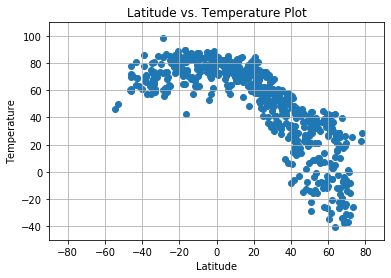

In [23]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature Plot")
plt.axis([-90, 90, -50, 110])
plt.grid()

## Latitude vs. Humidity Plot

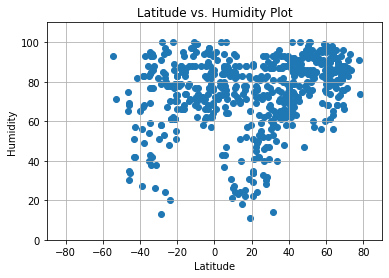

In [24]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot")
plt.axis([-90, 90, 0, 110])
plt.grid()

## Latitude vs. Cloudiness Plot

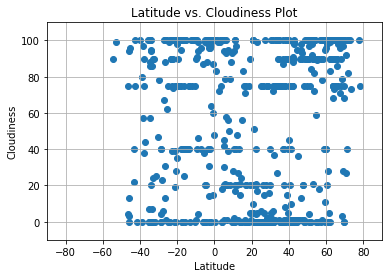

In [25]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness Plot")
plt.axis([-90, 90, -10, 110])
plt.grid()

## Latitude vs. Wind Speed Plot

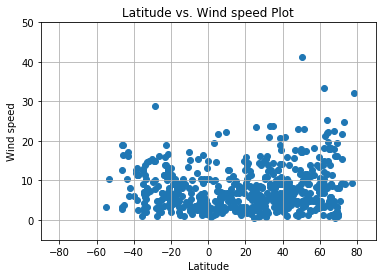

In [26]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.title("Latitude vs. Wind speed Plot")
plt.axis([-90, 90, -5, 50])
plt.grid()

## Linear Regression

In [51]:
clean_city_data_NH = clean_city_data[clean_city_data["Lat"] >= 0]
clean_city_data_SH = clean_city_data[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

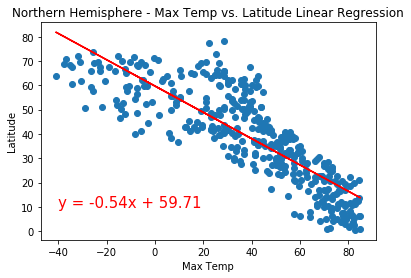

In [52]:
x_values = clean_city_data_NH["Max Temp"]
y_values = clean_city_data_NH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

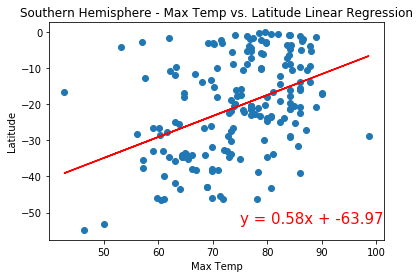

In [53]:
x_values = clean_city_data_SH["Max Temp"]
y_values = clean_city_data_SH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,-53),fontsize=15,color="red")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

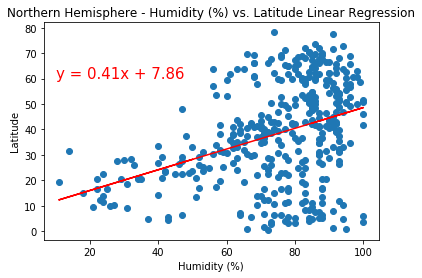

In [54]:
x_values = clean_city_data_NH["Humidity"]
y_values = clean_city_data_NH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

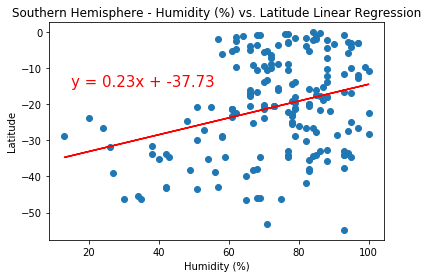

In [55]:
x_values = clean_city_data_SH["Humidity"]
y_values = clean_city_data_SH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,-15),fontsize=15,color="red")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

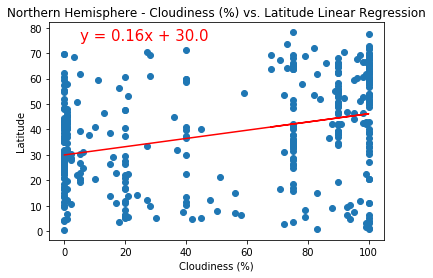

In [56]:
x_values = clean_city_data_NH["Cloudiness"]
y_values = clean_city_data_NH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,75),fontsize=15,color="red")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

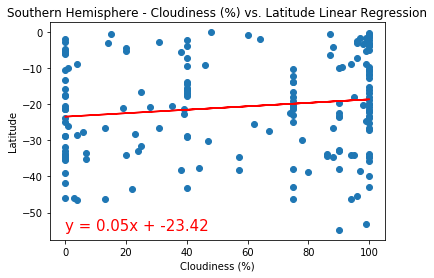

In [57]:
x_values = clean_city_data_SH["Cloudiness"]
y_values = clean_city_data_SH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-55),fontsize=15,color="red")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

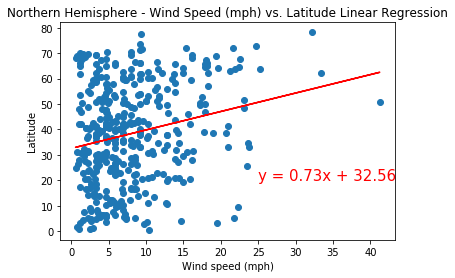

In [59]:
x_values = clean_city_data_NH["Wind speed"]
y_values = clean_city_data_NH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,20),fontsize=15,color="red")
plt.xlabel("Wind speed (mph)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

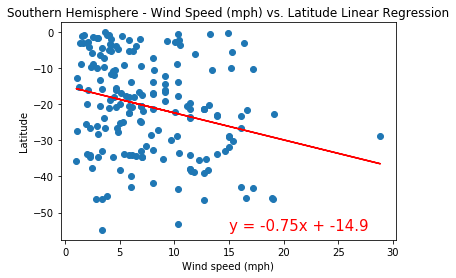

In [61]:
x_values = clean_city_data_SH["Wind speed"]
y_values = clean_city_data_SH["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,-55),fontsize=15,color="red")
plt.xlabel("Wind speed (mph)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()